In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

file_name = rf'/content/drive/MyDrive/Datasets/accepted_2007_to_2018Q4 cleaned encoded.csv'
loan_data_df = pd.read_csv(file_name)

In [ ]:
#######################################################################################################################
#Make new dataframe with only the encoded columns

selected_columns = [
    "purpose_car",
    "purpose_credit_card",
    "purpose_debt_consolidation",
    "purpose_house",
    "purpose_other",
    "loan_amnt_normalized",
    "term_binary",
    "days_since_issue_d_normalized",
    "installment_normalized",
    "int_rate_normalized",
    "grade_numerical",
    "sub_grade_numerical",
    "tot_cur_bal_normalized",
    "pymnt_plan_binary",
    "addr_state_encoded",
    "total_rec_int_normalized",
    "total_rec_late_fee_normalized",
    "total_rec_prncp_normalized",
    "out_prncp_normalized",
    "emp_title_encoded",
    "emp_length_numerical",
    "annual_inc_normalized",
    "ownership_MORTGAGE",
    "ownership_NONE",
    "ownership_OTHER",
    "ownership_OWN",
    "ownership_RENT",
    "delinq_2yrs_numerical",
    "inq_last_12m_numerical",
    "last_fico_range_low_numerical",
    "mort_acc_numerical",
    "mths_since_last_delinq_numerical",
    "num_actv_bc_tl_numerical",
    "open_il_12m_numerical",
    "tot_hi_cred_lim_normalized",
    "total_acc_numerical",
    "days_since_last_cred_pull_normalized",
    "loan_status_binary"
]

loan_data_df_encoded = loan_data_df[selected_columns]

#######################################################################################################################
#Perform SMOTE supersampling to balance the loan_status target feature

#Separate features and the target variable
features = loan_data_df_encoded.drop('loan_status_binary', axis=1)  # Drop the target column to isolate features
target = loan_data_df_encoded['loan_status_binary']  # Target variable

#Split the data into training and testing sets
features_train, features_test, target_train, target_test = (
                    train_test_split(features, target, test_size=0.2, random_state=42))

#Initialize the SMOTE object
smote = SMOTE(sampling_strategy='minority', random_state=42)  # Oversample the minority class

#Apply SMOTE to the training data
features_train_SMOTE, target_train_SMOTE = smote.fit_resample(features_train, target_train)



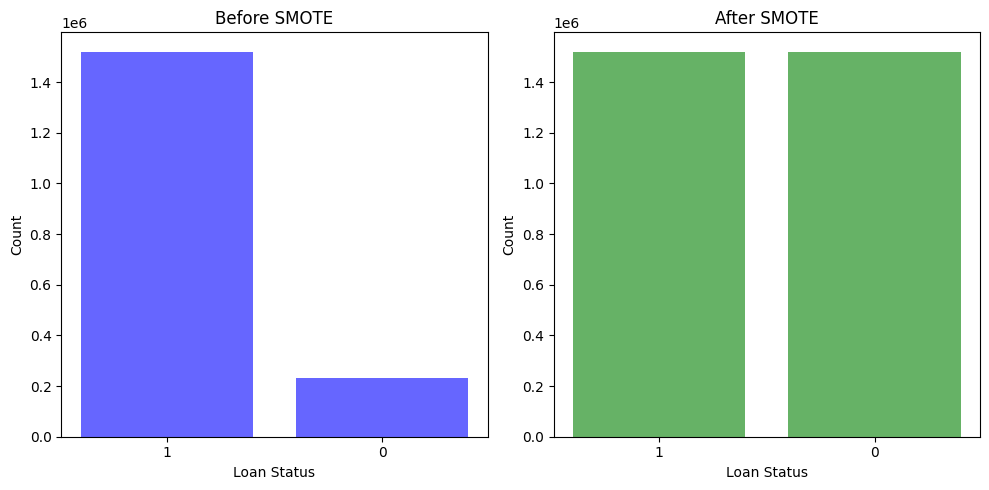

In [ ]:
#######################################################################################################################
#Plot the number of loan_status values before and after supersampling

#Counting the instances of each unique loan status value before SMOTE
before_counts = target_train.value_counts()

#Counting the instances of each unique loan status value after SMOTE
after_counts = target_train_SMOTE.value_counts()

#Setting up the figure for plotting
plt.figure(figsize=(10, 5))

#Plotting the bar chart for counts before SMOTE
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(before_counts.index.astype(str), before_counts.values, color='blue', alpha=0.6)
plt.title('Before SMOTE')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks([str(i) for i in before_counts.index])  # Ensure correct x-tick labels

#Plotting the bar chart for counts after SMOTE
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(after_counts.index.astype(str), after_counts.values, color='green', alpha=0.6)
plt.title('After SMOTE')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks([str(i) for i in after_counts.index])  # Ensure correct x-tick labels

#Adjusting layout for better fit
plt.tight_layout()

#Display the plot
plt.show()

In [ ]:
# Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Assuming loan_data_df is your DataFrame containing the dataset

# Select the columns for machine learning
selected_columns_ML = [
    "purpose_car",
    "purpose_credit_card",
    "purpose_debt_consolidation",
    "purpose_house",
    "purpose_other",
    "loan_amnt_normalized",
    "term_binary",
    "days_since_issue_d_normalized",
    "installment_normalized",
    "int_rate_normalized",
    "grade_numerical",
    "sub_grade_numerical",
    "tot_cur_bal_normalized",
    "pymnt_plan_binary",
    "addr_state_encoded",
    "total_rec_int_normalized",
    "total_rec_late_fee_normalized",
    "total_rec_prncp_normalized",
    "out_prncp_normalized",
    "emp_title_encoded",
    "emp_length_numerical",
    "annual_inc_normalized",
    "ownership_MORTGAGE",
    "ownership_NONE",
    "ownership_OTHER",
    "ownership_OWN",
    "ownership_RENT",
    "delinq_2yrs_numerical",
    "inq_last_12m_numerical",
    "last_fico_range_low_numerical",
    "mort_acc_numerical",
    "mths_since_last_delinq_numerical",
    "num_actv_bc_tl_numerical",
    "open_il_12m_numerical",
    "tot_hi_cred_lim_normalized",
    "total_acc_numerical",
    "days_since_last_cred_pull_normalized",
    "loan_status_binary"
]

# Filter the dataset to include only the selected columns
ml_data = loan_data_df[selected_columns_ML]

# Separate features and target variable
X = ml_data.drop('loan_status_binary', axis=1)
y = ml_data['loan_status_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9749284027533538
Confusion Matrix:
 [[ 49039   8331]
 [  2647 377849]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90     57370
           1       0.98      0.99      0.99    380496

    accuracy                           0.97    437866
   macro avg       0.96      0.92      0.94    437866
weighted avg       0.97      0.97      0.97    437866



In [ ]:
# Logistic Regression (with SMOTE)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = features_train_SMOTE, features_test, target_train_SMOTE, target_test

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9679787880310414
Confusion Matrix:
 [[ 51839   5531]
 [  8490 372006]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     57370
           1       0.99      0.98      0.98    380496

    accuracy                           0.97    437866
   macro avg       0.92      0.94      0.93    437866
weighted avg       0.97      0.97      0.97    437866



In [ ]:
# SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Select the columns for machine learning
selected_columns_ML = [
    "purpose_car",
    "purpose_credit_card",
    "purpose_debt_consolidation",
    "purpose_house",
    "purpose_other",
    "loan_amnt_normalized",
    "term_binary",
    "days_since_issue_d_normalized",
    "installment_normalized",
    "int_rate_normalized",
    "grade_numerical",
    "sub_grade_numerical",
    "tot_cur_bal_normalized",
    "pymnt_plan_binary",
    "addr_state_encoded",
    "total_rec_int_normalized",
    "total_rec_late_fee_normalized",
    "total_rec_prncp_normalized",
    "out_prncp_normalized",
    "emp_title_encoded",
    "emp_length_numerical",
    "annual_inc_normalized",
    "ownership_MORTGAGE",
    "ownership_NONE",
    "ownership_OTHER",
    "ownership_OWN",
    "ownership_RENT",
    "delinq_2yrs_numerical",
    "inq_last_12m_numerical",
    "last_fico_range_low_numerical",
    "mort_acc_numerical",
    "mths_since_last_delinq_numerical",
    "num_actv_bc_tl_numerical",
    "open_il_12m_numerical",
    "tot_hi_cred_lim_normalized",
    "total_acc_numerical",
    "days_since_last_cred_pull_normalized",
    "loan_status_binary"
]

# Filter the dataset to include only the selected columns
ml_data = loan_data_df[selected_columns_ML]

# Separate features and target variable
X = ml_data.drop('loan_status_binary', axis=1)
y = ml_data['loan_status_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

In [ ]:
# KNN

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Select the columns for machine learning
selected_columns_ML = [
    "purpose_car",
    "purpose_credit_card",
    "purpose_debt_consolidation",
    "purpose_house",
    "purpose_other",
    "loan_amnt_normalized",
    "term_binary",
    "days_since_issue_d_normalized",
    "installment_normalized",
    "int_rate_normalized",
    "grade_numerical",
    "sub_grade_numerical",
    "tot_cur_bal_normalized",
    "pymnt_plan_binary",
    "addr_state_encoded",
    "total_rec_int_normalized",
    "total_rec_late_fee_normalized",
    "total_rec_prncp_normalized",
    "out_prncp_normalized",
    "emp_title_encoded",
    "emp_length_numerical",
    "annual_inc_normalized",
    "ownership_MORTGAGE",
    "ownership_NONE",
    "ownership_OTHER",
    "ownership_OWN",
    "ownership_RENT",
    "delinq_2yrs_numerical",
    "inq_last_12m_numerical",
    "last_fico_range_low_numerical",
    "mort_acc_numerical",
    "mths_since_last_delinq_numerical",
    "num_actv_bc_tl_numerical",
    "open_il_12m_numerical",
    "tot_hi_cred_lim_normalized",
    "total_acc_numerical",
    "days_since_last_cred_pull_normalized",
    "loan_status_binary"
]

# Filter the dataset to include only the selected columns
ml_data = loan_data_df[selected_columns]

# Separate features and target variable
X = ml_data.drop('loan_status_binary', axis=1)
y = ml_data['loan_status_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn_model = KNeighborsClassifier()

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

In [ ]:
# Random Forest Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

selected_columns_ML = [
    "purpose_car",
    "purpose_credit_card",
    "purpose_debt_consolidation",
    "purpose_house",
    "purpose_other",
    "loan_amnt_normalized",
    "term_binary",
    "days_since_issue_d_normalized",
    "installment_normalized",
    "int_rate_normalized",
    "grade_numerical",
    "sub_grade_numerical",
    "tot_cur_bal_normalized",
    "pymnt_plan_binary",
    "addr_state_encoded",
    "total_rec_int_normalized",
    "total_rec_late_fee_normalized",
    "total_rec_prncp_normalized",
    "out_prncp_normalized",
    "emp_title_encoded",
    "emp_length_numerical",
    "annual_inc_normalized",
    "ownership_MORTGAGE",
    "ownership_NONE",
    "ownership_OTHER",
    "ownership_OWN",
    "ownership_RENT",
    "delinq_2yrs_numerical",
    "inq_last_12m_numerical",
    "last_fico_range_low_numerical",
    "mort_acc_numerical",
    "mths_since_last_delinq_numerical",
    "num_actv_bc_tl_numerical",
    "open_il_12m_numerical",
    "tot_hi_cred_lim_normalized",
    "total_acc_numerical",
    "days_since_last_cred_pull_normalized",
    "loan_status_binary"
]

# Filter the dataset to include only the selected columns
ml_data = loan_data_df[selected_columns_ML]

# Separate features and target variable
X = loan_data_df_encoded.drop('loan_status_binary', axis=1)
y = loan_data_df_encoded['loan_status_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest classifier
rf_model = RandomForestClassifier()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9883868580798691
Confusion Matrix:
 [[ 52669   4701]
 [   384 380112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95     57370
           1       0.99      1.00      0.99    380496

    accuracy                           0.99    437866
   macro avg       0.99      0.96      0.97    437866
weighted avg       0.99      0.99      0.99    437866



In [ ]:
# Stacking XGBoost (with Random Forest as Base Model)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

selected_columns_ML = [
    "purpose_car",
    "purpose_credit_card",
    "purpose_debt_consolidation",
    "purpose_house",
    "purpose_other",
    "loan_amnt_normalized",
    "term_binary",
    "days_since_issue_d_normalized",
    "installment_normalized",
    "int_rate_normalized",
    "grade_numerical",
    "sub_grade_numerical",
    "tot_cur_bal_normalized",
    "pymnt_plan_binary",
    "addr_state_encoded",
    "total_rec_int_normalized",
    "total_rec_late_fee_normalized",
    "total_rec_prncp_normalized",
    "out_prncp_normalized",
    "emp_title_encoded",
    "emp_length_numerical",
    "annual_inc_normalized",
    "ownership_MORTGAGE",
    "ownership_NONE",
    "ownership_OTHER",
    "ownership_OWN",
    "ownership_RENT",
    "delinq_2yrs_numerical",
    "inq_last_12m_numerical",
    "last_fico_range_low_numerical",
    "mort_acc_numerical",
    "mths_since_last_delinq_numerical",
    "num_actv_bc_tl_numerical",
    "open_il_12m_numerical",
    "tot_hi_cred_lim_normalized",
    "total_acc_numerical",
    "days_since_last_cred_pull_normalized",
    "loan_status_binary"
]

# Filter the dataset to include only the selected columns
ml_data = loan_data_df[selected_columns_ML]

# Separate features and target variable
X = loan_data_df_encoded.drop('loan_status_binary', axis=1)
y = loan_data_df_encoded['loan_status_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base models (Random Forest and XGBoost)
rf_model = RandomForestClassifier()

# Initialize the StackingClassifier with Random Forest and XGBoost as base models
stacking_model = StackingClassifier(
    classifiers=[rf_model],
    meta_classifier=XGBClassifier(),
    use_probas=False,
    use_features_in_secondary=True
)

# Fit the model on the training data
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.988377722864986
Confusion Matrix:
 [[ 52651   4719]
 [   370 380126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95     57370
           1       0.99      1.00      0.99    380496

    accuracy                           0.99    437866
   macro avg       0.99      0.96      0.97    437866
weighted avg       0.99      0.99      0.99    437866



In [ ]:
# Stacking AdaBoost (with Random Forest as Base Model)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

selected_columns_ML = [
    "purpose_car",
    "purpose_credit_card",
    "purpose_debt_consolidation",
    "purpose_house",
    "purpose_other",
    "loan_amnt_normalized",
    "term_binary",
    "days_since_issue_d_normalized",
    "installment_normalized",
    "int_rate_normalized",
    "grade_numerical",
    "sub_grade_numerical",
    "tot_cur_bal_normalized",
    "pymnt_plan_binary",
    "addr_state_encoded",
    "total_rec_int_normalized",
    "total_rec_late_fee_normalized",
    "total_rec_prncp_normalized",
    "out_prncp_normalized",
    "emp_title_encoded",
    "emp_length_numerical",
    "annual_inc_normalized",
    "ownership_MORTGAGE",
    "ownership_NONE",
    "ownership_OTHER",
    "ownership_OWN",
    "ownership_RENT",
    "delinq_2yrs_numerical",
    "inq_last_12m_numerical",
    "last_fico_range_low_numerical",
    "mort_acc_numerical",
    "mths_since_last_delinq_numerical",
    "num_actv_bc_tl_numerical",
    "open_il_12m_numerical",
    "tot_hi_cred_lim_normalized",
    "total_acc_numerical",
    "days_since_last_cred_pull_normalized",
    "loan_status_binary"
]

# Filter the dataset to include only the selected columns
ml_data = loan_data_df[selected_columns_ML]

# Separate features and target variable
X = loan_data_df_encoded.drop('loan_status_binary', axis=1)
y = loan_data_df_encoded['loan_status_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base model (Random Forest)
base_rf_model = RandomForestClassifier()

# Initialize the StackingClassifier with Random Forest as the base model and AdaBoost as the meta-learner
stacking_model = StackingClassifier(
    classifiers=[base_rf_model],
    meta_classifier=AdaBoostClassifier(),
    use_probas=False,
    use_features_in_secondary=True
)

# Fit the model on the training data
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

In [ ]:
# Stacking LightGBM (with Random Forest as Base Model)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

selected_columns_ML = [
    "purpose_car",
    "purpose_credit_card",
    "purpose_debt_consolidation",
    "purpose_house",
    "purpose_other",
    "loan_amnt_normalized",
    "term_binary",
    "days_since_issue_d_normalized",
    "installment_normalized",
    "int_rate_normalized",
    "grade_numerical",
    "sub_grade_numerical",
    "tot_cur_bal_normalized",
    "pymnt_plan_binary",
    "addr_state_encoded",
    "total_rec_int_normalized",
    "total_rec_late_fee_normalized",
    "total_rec_prncp_normalized",
    "out_prncp_normalized",
    "emp_title_encoded",
    "emp_length_numerical",
    "annual_inc_normalized",
    "ownership_MORTGAGE",
    "ownership_NONE",
    "ownership_OTHER",
    "ownership_OWN",
    "ownership_RENT",
    "delinq_2yrs_numerical",
    "inq_last_12m_numerical",
    "last_fico_range_low_numerical",
    "mort_acc_numerical",
    "mths_since_last_delinq_numerical",
    "num_actv_bc_tl_numerical",
    "open_il_12m_numerical",
    "tot_hi_cred_lim_normalized",
    "total_acc_numerical",
    "days_since_last_cred_pull_normalized",
    "loan_status_binary"
]

# Filter the dataset to include only the selected columns
ml_data = loan_data_df[selected_columns_ML]

# Separate features and target variable
X = loan_data_df_encoded.drop('loan_status_binary', axis=1)
y = loan_data_df_encoded['loan_status_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base model (Random Forest)
base_rf_model = RandomForestClassifier()

# Initialize the ensemble model (LightGBM)
lgbm_model = LGBMClassifier()

# Initialize the StackingClassifier with Random Forest as the base model and LightGBM as the meta-learner
stacking_model = StackingClassifier(
    classifiers=[base_rf_model],
    meta_classifier=lgbm_model,
    use_probas=False,
    use_features_in_secondary=True
)

# Fit the model on the training data
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

In [ ]:
# XGBoost

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Select the columns for machine learning
selected_columns_ML = [
    "purpose_car",
    "purpose_credit_card",
    "purpose_debt_consolidation",
    "purpose_house",
    "purpose_other",
    "loan_amnt_normalized",
    "term_binary",
    "days_since_issue_d_normalized",
    "installment_normalized",
    "int_rate_normalized",
    "grade_numerical",
    "sub_grade_numerical",
    "tot_cur_bal_normalized",
    "pymnt_plan_binary",
    "addr_state_encoded",
    "total_rec_int_normalized",
    "total_rec_late_fee_normalized",
    "total_rec_prncp_normalized",
    "out_prncp_normalized",
    "emp_title_encoded",
    "emp_length_numerical",
    "annual_inc_normalized",
    "ownership_MORTGAGE",
    "ownership_NONE",
    "ownership_OTHER",
    "ownership_OWN",
    "ownership_RENT",
    "delinq_2yrs_numerical",
    "inq_last_12m_numerical",
    "last_fico_range_low_numerical",
    "mort_acc_numerical",
    "mths_since_last_delinq_numerical",
    "num_actv_bc_tl_numerical",
    "open_il_12m_numerical",
    "tot_hi_cred_lim_normalized",
    "total_acc_numerical",
    "days_since_last_cred_pull_normalized",
    "loan_status_binary"
]

# Filter the dataset to include only the selected columns
ml_data = loan_data_df[selected_columns_ML]

# Separate features and target variable
X = ml_data.drop('loan_status_binary', axis=1)
y = ml_data['loan_status_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

In [ ]:
# Random Forest Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

selected_columns_ML = [
    "purpose_car",
    "purpose_credit_card",
    "purpose_debt_consolidation",
    "purpose_house",
    "purpose_other",
    "loan_amnt_normalized",
    "term_binary",
    "days_since_issue_d_normalized",
    "installment_normalized",
    "int_rate_normalized",
    "grade_numerical",
    "sub_grade_numerical",
    "tot_cur_bal_normalized",
    "pymnt_plan_binary",
    "addr_state_encoded",
    "total_rec_int_normalized",
    "total_rec_late_fee_normalized",
    "total_rec_prncp_normalized",
    "out_prncp_normalized",
    "emp_title_encoded",
    "emp_length_numerical",
    "annual_inc_normalized",
    "ownership_MORTGAGE",
    "ownership_NONE",
    "ownership_OTHER",
    "ownership_OWN",
    "ownership_RENT",
    "delinq_2yrs_numerical",
    "inq_last_12m_numerical",
    "last_fico_range_low_numerical",
    "mort_acc_numerical",
    "mths_since_last_delinq_numerical",
    "num_actv_bc_tl_numerical",
    "open_il_12m_numerical",
    "tot_hi_cred_lim_normalized",
    "total_acc_numerical",
    "days_since_last_cred_pull_normalized",
    "loan_status_binary"
]

# Filter the dataset to include only the selected columns
ml_data = loan_data_df[selected_columns_ML]

# Separate features and target variable
X = ml_data.drop('loan_status_binary', axis=1)
y = ml_data['loan_status_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""# Initialize the random forest classifier
rf_model = RandomForestClassifier()

# Creating an instance of Random Forest Classifier with the specified hyperparameters
model = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=1,
                               max_features='auto', max_depth=20)

"""

# Creating an instance of Random Forest Classifier with the specified hyperparameters
rf_model = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=1,
                               max_features='auto', max_depth=20)


# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


